In [252]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

def drawing_bbox(img, result, name_dict):
    boxes = result[0].boxes
    for i, bbox in enumerate(boxes.xyxy):
        x,y,w,h = [int(coord) for coord in bbox[:4]]
        img = cv.rectangle(img, (int(x), int(y)), (int(w), int(h)), (255,0,0), 2)
        label = f'{name_dict[boxes.cls[i].int().item()]} {boxes.conf[i]:.2f}'
        cv.putText(img, label, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    return img

model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')
model.train(data='coco128.yaml', epochs=100)

cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

try:
    width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    print(f'width: {width}, height: {height}') # width, height)

    fourcc = cv.VideoWriter_fourcc(*'XVID')
    out = cv.VideoWriter('output.avi', fourcc, 20.0, (width, height), isColor=False)
    while True:
        ret, frame = cap.read()
        frame = cv.flip(frame, 1)
        result = model(frame)
        frame = drawing_bbox(frame, result, model.names)
        
        cv.imshow('frame', frame)
        # cv.imshow('frame', gray)
        if cv.waitKey(1) == 27:
            break
finally:
    cap.release()
    out.release()
    cv.destroyAllWindows()

width: 640, height: 480

0: 480x640 1 person, 1 tv, 9.6ms
Speed: 6.0ms preprocess, 9.6ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 tv, 1 laptop, 13.9ms
Speed: 7.1ms preprocess, 13.9ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 laptop, 12.3ms
Speed: 5.5ms preprocess, 12.3ms inference, 3.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 laptop, 14.4ms
Speed: 7.3ms preprocess, 14.4ms inference, 4.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 tv, 1 laptop, 16.8ms
Speed: 5.1ms preprocess, 16.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 tv, 1 laptop, 17.8ms
Speed: 2.3ms preprocess, 17.8ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 2 laptops, 12.1ms
Speed: 2.7ms preprocess, 12.1ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640

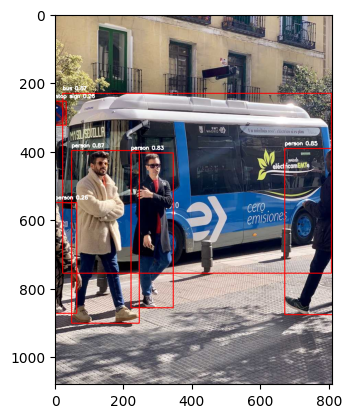

In [249]:
from ultralytics.utils import ops
import copy
import torch
img = results[0].orig_img
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

def drawing_bbox(img, result, name_dict):
    boxes = result[0].boxes
    for i, bbox in enumerate(boxes.xyxy):
        x,y,w,h = [int(coord) for coord in bbox[:4]]
        img = cv.rectangle(img, (int(x), int(y)), (int(w), int(h)), (255,0,0), 2)
        label = f'{name_dict[boxes.cls[i].int().item()]} {boxes.conf[i]:.2f}'
        cv.putText(img, label, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    return img

img = drawing_bbox(img, results, model.names)
plt.imshow(img)